# LAB5 e Texto

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Luís Fonseca
## Número: 45125

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab5Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (1500 amostras)
### 2. "y":              classe dos dados (3 classes, inteiros de 0 a 2)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


# Pergunta 1 - SVMs:
## i. Use os dados de treino para treinar uma máquina de suporte vetorial (SVM) para classificar os dados. Não especifique nenhum parâmetro ao declarar o classificador (ex: $\texttt{svm=SVC()}$). Classifique os dados de treino e de teste. Imprima o número total de erros e as matrizes de confusão para o treino e teste.
## ii. Repita a alínea anterior especificando o kernel RBF, e fazendo uma pesquisa em grelha (usando a função $\texttt{GridSearchCV}$, com o número de folds igual a 3 (três), para os parâmetros $\texttt{C}$ e $\texttt{gamma}$. Use os seguintes valores: $\texttt{C}=\{0.1,1,10,20\}$ e $\texttt{gamma}=\{0.01,0.1,1\}$. Imprima os valores dos parâmetros que obtiveram os melhores resultados.
## iii. Use os dados de treino para treinar uma máquina de suporte vetorial (SVM) com um kernel RBF e com os valores de $\texttt{C}$ e $\texttt{gamma}$ que obtiveram os melhores resultados na alínea anterior. Classifique os dados de treino e de teste. Imprima o número total de erros e as matrizes de confusão para o treino e teste.
## iv. Faça um "plot" dos dados de teste por classe, e dos erros do classificador SVM.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

D=pickle.load(open('Lab5Data.p','rb'))
print(D.keys())
svm=SVC()

dict_keys(['X', 'y', 'foldTrain', 'foldTest'])


In [94]:
X = D['X']*1
y = D['y']
foldTrain = D['foldTrain']
foldTest = D['foldTest']

X1 = X[:,foldTrain]
X2 = X[:,foldTest]
y1 = y[foldTrain]
y2 = y[foldTest]

svm1=SVC().fit(X1.T,y1)

yer1=svm1.predict(X1.T)
yer2=svm1.predict(X2.T)

print("Nº erros treino:",np.sum(y1!=yer1))
print("Matriz confusao treino", confusion_matrix(y1,yer1))
print()

print("Nº erros teste:",np.sum(y2!=yer2))
print("Matriz confusao teste", confusion_matrix(y2,yer2))


Nº erros treino: 55
Matriz confusao treino [[220  12   9]
 [  9 241   6]
 [ 11   8 217]]

Nº erros teste: 53
Matriz confusao teste [[243  11   5]
 [  8 231   5]
 [ 14  10 240]]


In [95]:
from sklearn.model_selection import cross_val_score,GridSearchCV
gList = [0.01, 0.1, 1]
cList = [0.1, 1, 10, 20]
grelha={'gamma':gList, 'C':cList}

gSearch = GridSearchCV(SVC(kernel='rbf'), param_grid=grelha, cv=3)
gSearch.fit(X1.T, y1)

svm = gSearch.best_estimator_
par = gSearch.best_params_
print("% acertos no treino:", svm.score(X1.T, y1))
print("% acertos no teste:", svm.score(X2.T, y2))
print('Parâmetros: gamma=%.4f, C=%.1f'%(par['gamma'], par['C']))
print()

% acertos no treino: 0.9154160982264665
% acertos no teste: 0.9308996088657105
Parâmetros: gamma=0.1000, C=20.0



In [96]:
gSearch = SVC(kernel='rbf', C=par['C'], gamma=par['gamma'])
gSearch.fit(X1.T, y1)

ye1 = svm.predict(X1.T)
ye2 = svm.predict(X2.T)
print("erros no treino :" , np.sum(ye1!=y1))
print("erros no teste :" , np.sum(ye2!=y2))
cm1 = confusion_matrix(y1,ye1)
cm2 = confusion_matrix(y2,ye2)
print("matriz de confusao do treino :\n",cm1)
print("matriz de confusao do teste :\n",cm2)

erros no treino : 62
erros no teste : 53
matriz de confusao do treino :
 [[217  12  12]
 [  9 237  10]
 [ 10   9 217]]
matriz de confusao do teste :
 [[243  11   5]
 [  9 228   7]
 [ 13   8 243]]


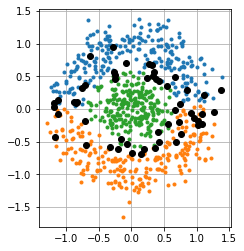

In [97]:
plt.plot(X2.T[y2==0,0],X2.T[y2==0,1],'.')
plt.plot(X2.T[y2==1,0],X2.T[y2==1,1],'.')
plt.plot(X2.T[y2==2,0],X2.T[y2==2,1],'.')
plt.plot(X2.T[y2!=ye2,0],X2.T[y2!=ye2,1],'ok')
plt.axis('scaled')
plt.grid(True)

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Dados de texto $\texttt{melville-moby_dick.txt}$:
## i. Considere os documentos da lista "$\texttt{Docs}$" (obtidos a partir do texto de Moby Dick).  Limpe cada documento de modo a só conterem caracteres alfabéticos. 
## ii. Faça a representação tf-idf dos documentos limpos. Use só os seguintes parâmetros: $\texttt{min_df=3}$ e $\texttt{token_pattern=r'\b\w\w\w\w+\b'}$
## iii. Liste as 100 palavras (tokens) do vocabulário mais representativas.
## iv.  Liste as 100 palavras do vocabulário que aparecem no maior número de documentos.

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import re
f=open('melville-moby_dick.txt','r')
book=f.read()
print(book[:1500])
bL=book.split('\n\n')
lc=[len(k) for k in bL]
Docs=[bL[k] for k in range(len(bL)) if lc[k]>100]
Docs=[d.replace('\n',' ') for d in Docs]

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach them by what
name a whale-fish is to be called in our tongue leaving out, through
ignorance, the letter H, which almost alone maketh the signification
of the word, you deliver that which is not true." --HACKLUYT

"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness
or rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER'S
DICTIONARY

"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;
A.S. WALW-IAN, to roll, to wallow." --RICHARDSON'S DICTIONARY

KETOS,               GRE

In [99]:
print(Docs[0])
print()

Docs2 = [doc.replace('<br />', ' ') for doc in Docs]
Docs3 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs2]

print(Docs3[0])

The pale Usher--threadbare in coat, heart, body, and brain; I see him now.  He was ever dusting his old lexicons and grammars, with a queer handkerchief, mockingly embellished with all the gay flags of all the known nations of the world.  He loved to dust his old grammars; it somehow mildly reminded him of his mortality.

The pale Usher threadbare in coat heart body and brain I see him now He was ever dusting his old lexicons and grammars with a queer handkerchief mockingly embellished with all the gay flags of all the known nations of the world He loved to dust his old grammars it somehow mildly reminded him of his mortality 


In [100]:
tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w\w+\b').fit(Docs3)
tokens = tfidf.get_feature_names()
X_new = tfidf.transform(Docs3)
print(X_new.shape, type(X_new))
print()

(2025, 6102) <class 'scipy.sparse.csr.csr_matrix'>



In [101]:
xM = np.max(X_new, axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]
#as 100 mais importantes
print(voc[:100])
print()

['ginger', 'start', 'spring', 'porpoise', 'thunder', 'delight', 'cook', 'pull', 'owners', 'hearse', 'chap', 'fool', 'monsieur', 'follow', 'bell', 'waif', 'speaking', 'crow', 'huzza', 'purse', 'squeeze', 'bunger', 'canallers', 'bildad', 'heeded', 'queen', 'jonah', 'loose', 'drive', 'elephant', 'langsdorff', 'ghosts', 'chicha', 'grow', 'shiver', 'macey', 'flask', 'hemp', 'indispensable', 'bouton', 'line', 'cabaco', 'burtons', 'game', 'immortal', 'devil', 'queer', 'seven', 'down', 'turn', 'statement', 'luck', 'stump', 'letter', 'carpenter', 'master', 'compass', 'beer', 'stop', 'together', 'sleep', 'considering', 'monkey', 'yarman', 'shark', 'thou', 'aboard', 'balls', 'kill', 'roll', 'helm', 'blows', 'coffee', 'desert', 'gone', 'read', 'buffalo', 'temple', 'fish', 'sabbath', 'breeze', 'ambergris', 'lesson', 'deacon', 'child', 'maketh', 'examples', 'person', 'three', 'news', 'didst', 'farewell', 'doubts', 'yourself', 'whaling', 'facts', 'savage', 'remember', 'avast', 'perth']



In [102]:
idf = tfidf.idf_
idx = np.argsort(idf)
voc = [tokens[i] for i in idx]
#as 100 mais importantes
print(voc[:100])
print()

['that', 'with', 'this', 'from', 'whale', 'there', 'have', 'which', 'then', 'some', 'were', 'like', 'when', 'upon', 'they', 'what', 'into', 'their', 'more', 'ship', 'them', 'other', 'these', 'over', 'ahab', 'been', 'would', 'only', 'down', 'will', 'such', 'though', 'time', 'long', 'still', 'than', 'very', 'head', 'great', 'before', 'here', 'about', 'those', 'last', 'must', 'said', 'most', 'after', 'seemed', 'again', 'boat', 'while', 'captain', 'round', 'first', 'little', 'every', 'much', 'whales', 'could', 'white', 'being', 'three', 'through', 'same', 'almost', 'hand', 'well', 'where', 'ever', 'side', 'might', 'sperm', 'thing', 'himself', 'even', 'good', 'away', 'stubb', 'water', 'never', 'deck', 'made', 'queequeg', 'look', 'should', 'your', 'world', 'among', 'without', 'many', 'pequod', 'starbuck', 'life', 'once', 'come', 'sort', 'seen', 'back', 'thou']

